In [332]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os 
from PIL import Image
from pprint import pprint

Image load and covert gray scale and reshape 1D

In [333]:
x_train1=[]
y_train1=[]

directory=r'Trainnig'     
list=os.listdir(directory)
print(list[0])

level=0
lname=['Circle','Line','Rectangle','Triangle']
for i in range(0,len(list)):
    img=cv2.imread(r'Trainnig/'+str(list[i])+'',2)
    temp=img.reshape(-1)
    x_train1.append(temp)
    y_train1.append(lname[level])
    if((i+1)%20==0):
        level+=1
    
    
#x_train1,y_train1


C1.jpg


Training data to testing for split

In [334]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x_train1,y_train1, test_size=0.2)
xtr=np.array(x_train)
xte=np.array(x_test)
ytr=np.array(y_train)
yte=np.array(y_test)
print(xtr.shape)
print(xte.shape)
print(ytr.shape)
print(yte.shape)

(64, 10000)
(16, 10000)
(64,)
(16,)


Testing Folder to accuracy check

In [335]:
x_test1=[]
y_test1=[]

directory1=r'testing'     
list=os.listdir(directory1)
print(list[0])

level=0
for i in range(0,len(list)):
    img=cv2.imread(r'Trainnig/'+str(list[i])+'',2)
    temp=img.reshape(-1)
    x_test1.append(temp)
    y_test1.append(lname[level])
    if((i+1)%10==0):
        level+=1
    
    
#x_test1,y_test1


C1.jpg


K-nearest neighbour accuracy

In [336]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train1, y_train1)
y_pred = knn.predict(x_test1)
print(y_pred)
print(metrics.accuracy_score(y_test1, y_pred)*100)

['Circle' 'Line' 'Line' 'Line' 'Line' 'Line' 'Circle' 'Line' 'Line' 'Line'
 'Line' 'Line' 'Line' 'Line' 'Line' 'Line' 'Line' 'Line' 'Line' 'Line'
 'Rectangle' 'Line' 'Line' 'Line' 'Line' 'Line' 'Line' 'Line' 'Line'
 'Line' 'Line' 'Line' 'Line' 'Line' 'Triangle' 'Line' 'Triangle' 'Line'
 'Triangle' 'Line']
40.0


Logistic Regression accuracy

In [337]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train1, y_train1)
y_pred = logreg.predict(x_test1)
print(y_pred,len(y_pred))
print(metrics.accuracy_score(y_test1, y_pred)*100)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


['Circle' 'Circle' 'Circle' 'Circle' 'Circle' 'Circle' 'Circle' 'Circle'
 'Circle' 'Circle' 'Line' 'Line' 'Line' 'Line' 'Line' 'Line' 'Line' 'Line'
 'Line' 'Line' 'Rectangle' 'Rectangle' 'Rectangle' 'Rectangle' 'Rectangle'
 'Rectangle' 'Rectangle' 'Rectangle' 'Rectangle' 'Triangle' 'Triangle'
 'Triangle' 'Triangle' 'Triangle' 'Triangle' 'Triangle' 'Triangle'
 'Triangle' 'Triangle' 'Triangle'] 40
97.5


Perceptron accuracy

In [338]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(x_train1, y_train1)
Perceptron()
y_pred_p=clf.predict(x_test1)

print(metrics.accuracy_score(y_test1, y_pred)*100)

97.5


Decision tree accuracy

In [339]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_leaf_nodes=20000)
model.fit(x_train1, y_train1)
y_pred_d = model.predict(x_test1)
print(metrics.accuracy_score(y_test1, y_pred)*100)

97.5


# Test image load paint

In [340]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *
from tkinter.font import Font

width = 300
height = 300
#center = height//2
white = (255, 255, 255)
def save():
    filename = "test.jpg"
    image1.save(filename)
    root.destroy()

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    cv.create_oval(x1, y1, x2, y2, fill="black",width=9)
    draw.line([x1, y1, x2, y2],fill="black",width=6)
    

root = Tk()

cv = Canvas(root, width=width, height=height, bg='white') #canvas 
cv.pack()

image1 = PIL.Image.new("RGB", (width, height), white)     #create an empty image 
draw = ImageDraw.Draw(image1)


cv.pack(expand=YES, fill=BOTH)
cv.bind("<B1-Motion>", paint)

button=Button(text="save",command=save)
button.pack()
root.wm_title("Paint Window")
root.mainloop()


In [341]:
#img=cv2.imread('t3.jpg',2)
#temp1=[(img.reshape(-1))]
#temp1

In [342]:
image_path = r'C:\Users\abuha\Desktop\SEMESTER\MLerning\ML Project\Geometry Shape\test.jpg'   # Image path 
directory = r'C:\Users\abuha\Desktop\SEMESTER\MLerning\ML Project\Geometry Shape'             # Image directory

img = cv2.imread(image_path,2) 
img2= cv2.resize(img,(100,100)) 
  
os.chdir(directory) 
filename = 'test.jpg'

cv2.imwrite(filename, img2) 

True

In [347]:
img=cv2.imread('test.jpg',2)
print(img.shape)
temp1=[(img.reshape(-1))]
temp1

(100, 100)


[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)]

# Final Prediction by using some algo (KNN,LR,Perceptron)

In [344]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train1, y_train1)
y_pred_k = knn.predict(temp1)
print(y_pred_k)

['Line']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


['Line']


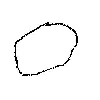

In [345]:
from IPython.display import Image
logreg = LogisticRegression()
logreg.fit(x_train1, y_train1)
y_pred = logreg.predict(temp1)
print(y_pred)
Image("test.jpg")

['Circle']


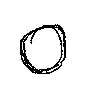

In [329]:

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(x_train1, y_train1)
Perceptron()
y_pred=clf.predict(temp1)


print(y_pred)
Image("test.jpg")

In [330]:
root = Tk()
root.title("................Result.................")
root.geometry("400x400+400+90")
root.configure(bg="white")
canvas = Canvas(root, width=200, height=200)
canvas.pack()
canvas.place(x=100, y=115)
title = Label(canvas, text=y_pred, fg="purple",bg="white", font=Font(family="Times New Romad", size=24, weight="bold",underline=1)).pack(side=TOP)
root.mainloop()
